##### **Imports**

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.stats import expon, norm , chi2
from scipy.optimize import minimize
from matplotlib.ticker import AutoMinorLocator
from scipy.special import erf

colors = ['crimson','midnightblue', 'magenta','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

##### **Problem 3a**

Get data

In [160]:
df = pd.read_csv('NucData.txt',header=None)
df.columns = ['Data'] # Set column names
data = np.array(df['Data'])
pseudo_experiments = np.split(data, 100)

Functions

In [161]:
x_min = -2
x_max = 10

def null(x,sigma_t):
    func = lambda x: (np.exp( -(2*x-sigma_t**2) / (2) ) * (erf( (x-sigma_t**2)/(np.sqrt(2)*sigma_t) ) + 1)) / 2
    norm, _ = quad(func, x_min, x_max)
    pdf = (np.exp( -(2*x-sigma_t**2) / (2) ) * (erf( (x-sigma_t**2)/(np.sqrt(2)*sigma_t) ) + 1)) / 2
    normalized_pdf = pdf / norm
    return normalized_pdf

def alternative(x,sigma_t,b):
    func = lambda x: (np.exp( -(2*b*x-sigma_t**2) / (2*b**2) ) * (erf( (b*x-sigma_t**2)/(np.sqrt(2)*b*sigma_t) ) + 1)) / (2*b)
    norm, _ = quad(func, x_min, x_max)
    pdf = (np.exp( -(2*b*x-sigma_t**2) / (2*b**2) ) * (erf( (b*x-sigma_t**2)/(np.sqrt(2)*b*sigma_t) ) + 1)) / (2*b)
    normalized_pdf = pdf / norm
    return normalized_pdf

def log_likelihood_null(x,sigma_t):
    return np.sum(np.log(null(x,sigma_t)))

def log_likelihood_alternative(x,sigma_t,b):
    return np.sum(np.log(alternative(x,sigma_t,b)))

Computing Log-Likelihoods

In [162]:
neg_2_ln_lambdas = []

for experiment in pseudo_experiments:
    lambda_neg_LLH_1 = lambda params: -log_likelihood_null(experiment,params[0])
    res_1 = minimize(lambda_neg_LLH_1,x0=1.,bounds=[(0.3,100)],method='L-BFGS-B')
    min_sigma_1 = res_1.x
    
    lambda_neg_LLH_2 = lambda params: -log_likelihood_alternative(experiment,params[0],params[1])
    res_2 = minimize(lambda_neg_LLH_2,x0=[1.,1.],bounds=((0.3,10),(0.2,100)),method='L-BFGS-B')
    min_sigma_2 , min_b_2 = res_2.x
    
    diff = 2 * (res_1.fun - res_2.fun)
    
    neg_2_ln_lambdas.append(diff)

Plot

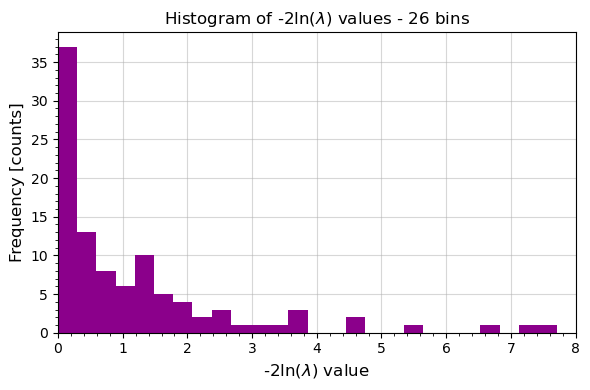

In [170]:
plt.figure(figsize = (6,4))

bin_number = 26

plt.hist(neg_2_ln_lambdas,bins=bin_number,density=False,color='darkmagenta')

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title(f'Histogram of -2ln($\lambda$) values - {bin_number} bins',fontsize=12)
plt.xlabel('-2ln($\lambda$) value',fontsize=12)
plt.ylabel('Frequency [counts]',fontsize=12)
plt.xlim(0,8)
#plt.ylim(0,23)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('Problem3_Fig3a.pdf')

##### **Problem 3b**

In [171]:
sum = 0 # Count how many values are above 2.706

for lambda_value in neg_2_ln_lambdas:
    if lambda_value > 2.706:
        sum += 1
        
sum

11

In [ ]:
1 - (100 - sum) / 100

In [178]:
1 - chi2.cdf(2.706, df=1) # Compute our expected number above 2.706, given chi2-distribution

0.0999713781252588